## This script demonstrates Line of best fit, using line fitting algorithm { - }
### Name : Ji-Su Lee  {-}
### Student ID : 20141718  {-}
### github link : https://github.com/Jisu-Lee/HII {-}

### import packages for plotting graphs and manipulating data {-}

In [65]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.spatial import distance

### setting variables {-}

In [67]:
num     = 50
std     = 150
a       = 2 
b       = 10

# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b
n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

### show noisy data and clean data {-}
* blue dot : noisy data
* black line : clean data

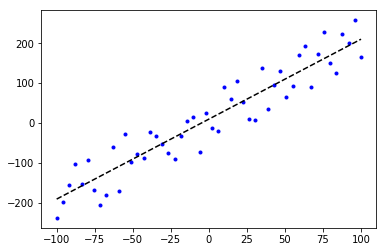

In [68]:
plt.plot(x, y1, 'b.', x, y2, 'k--')
plt.show()

# define function to get matrix A

In [70]:
def generateMatrixA(data, p):
    A = []
    n = len(data)
    for i in range (n):
        A.append([])
        for j in range (p+1):
            A[i].append(np.power(data[i], j))
            
    return A    

# define function to calculate model parameters

In [72]:
def generateParam(A, b):
    A0 = np.array(A)
    AT = A0.transpose()
    AR = AT @ A0
    AR = inv(AR) @ AT
    param = AR @ b
    return param

# define function to generate new result

In [74]:
def generateB(A, param):
    p = len(A[0])
    B = np.dot(A,param)
    return B

# define function to compute error

In [76]:
def computeError(y, yt):
    dst = np.square(distance.euclidean(y, yt))
    return dst

# let's see the result

P :  0


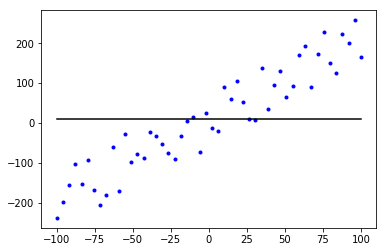

P :  1


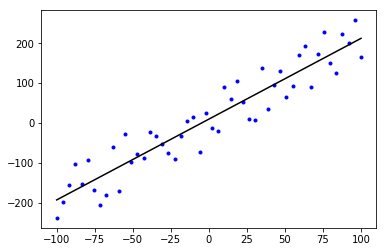

P :  2


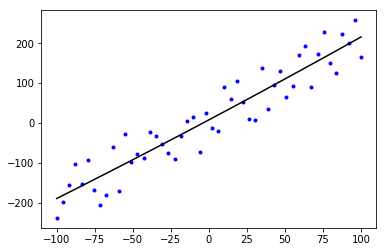

P :  3


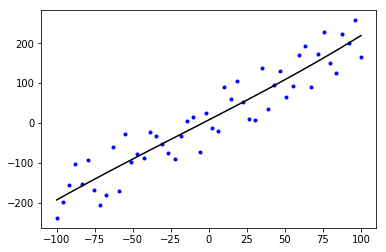

P :  4


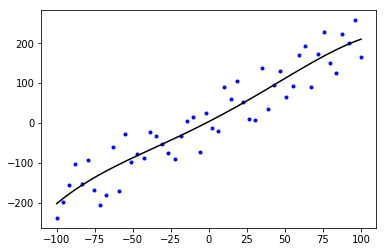

P :  5


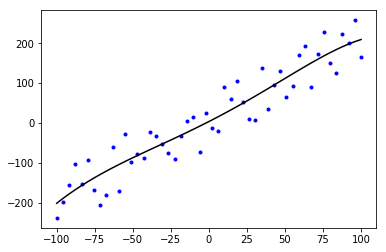

P :  6


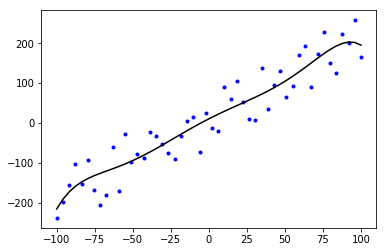

P :  7


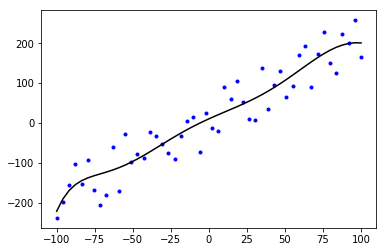

P :  8


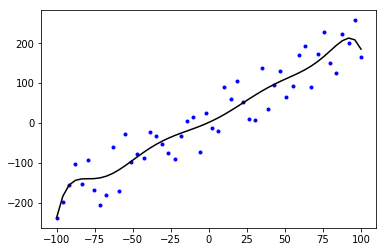

P :  9


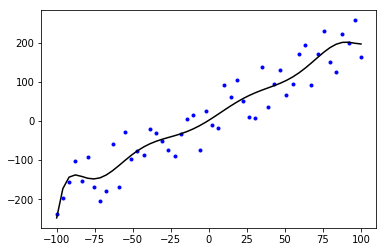

In [81]:
# e = list to contain error
e = []

for i in range(10):
    p = i
    print("P : ", p)
    A = generateMatrixA(x, p)
    theta = generateParam(A, y1)
    yr = generateB(A, theta)
    plt.plot(x, y1, 'b.', x, yr, 'k')
    plt.show()
    e.append(computeError(y1, yr))

# error graph

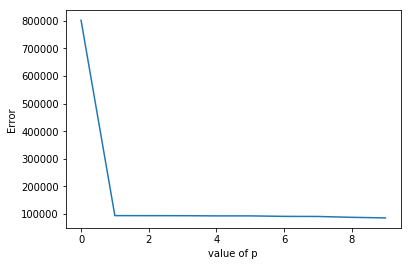

In [80]:
w = np.arange(0,10)
plt.plot(w,e)
plt.xlabel('value of p')
plt.ylabel('Error')
plt.show()